+jk.9### Importa as bibliotecas

In [47]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter("ignore")

pd.Timestamp.fromtimestamp(int("1584199972"))

Timestamp('2020-03-14 12:32:52')

##### Exibe a versão do Panda

In [48]:
pd.__version__

'1.3.4'

##### Carrega o Arquivo 

In [49]:
df = pd.read_excel('movimentacao-2022-ate-31-10.xlsx', sheet_name="Movimentação")

##### Exibe as linhas do arquivo

In [50]:
df.head()

,Entrada/Saída,Data,Movimentação,Produto,Instituição,Quantidade,Preço unitário,Valor da Operação
0,Credito,18/10/2022,Dividendo,VIVT3 - TELEFONICA BRASIL S/A,CLEAR CORRETORA - GRUPO XP,6,1.21,7.27
1,Credito,17/10/2022,Rendimento,BCFF11 - FDO INV IMOB - FII BTG PACTUAL FUNDO ...,CLEAR CORRETORA - GRUPO XP,12,0.56,6.72
2,Credito,17/10/2022,Rendimento,SADI11 - SANTANDER PAPÉIS IMOBILIÁRIOS CDI FII,CLEAR CORRETORA - GRUPO XP,2,1.05,2.1
3,Credito,13/10/2022,Dividendo,RAIZ4 - RAIZEN S.A.,CLEAR CORRETORA - GRUPO XP,50,0.03,1.57
4,Credito,11/10/2022,Juros Sobre Capital Próprio,MOVI3 - MOVIDA,CLEAR CORRETORA - GRUPO XP,15,0.15,1.87


##### Exibe as Colunas do Arquivo

In [51]:
df.columns

Index(['Entrada/Saída', 'Data', 'Movimentação', 'Produto', 'Instituição',
       'Quantidade', 'Preço unitário', 'Valor da Operação'],
      dtype='object')

##### Exibe os tipos de cada coluna 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entrada/Saída      226 non-null    object
 1   Data               226 non-null    object
 2   Movimentação       226 non-null    object
 3   Produto            226 non-null    object
 4   Instituição        226 non-null    object
 5   Quantidade         226 non-null    int64 
 6   Preço unitário     226 non-null    object
 7   Valor da Operação  226 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.2+ KB


##### Trata os dados das colunas ('Preço unitário', 'Valor da Operação', 'Produto')

In [53]:
df['Preço unitário'] = df['Preço unitário'].apply(lambda x : str(x).replace("-", "0"))
df['Valor da Operação'] = df['Valor da Operação'].apply(lambda x : str(x).replace("-", "0"))
df["Produto"] = df["Produto"].str.split("-").str.get(0).str.strip()

##### Converte as colunas ('Preço unitário', 'Valor da Operação') para o float

In [54]:
df['Preço unitário'] =df['Preço unitário'].astype('float64')
df['Valor da Operação'] =df['Valor da Operação'].astype('float64')

##### Converte a coluna ('Data') para o tipo Date

In [55]:
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True)

##### Count

In [56]:
df.count()

Entrada/Saída        226
Data                 226
Movimentação         226
Produto              226
Instituição          226
Quantidade           226
Preço unitário       226
Valor da Operação    226
dtype: int64

##### Discribe

In [57]:
df.describe()

,Quantidade,Preço unitário,Valor da Operação
count,226.000000,226.000000,226.000000
mean,19.230088,13.916991,131.807345
std,35.363511,21.801944,219.824416
min,0.000000,0.000000,0.000000
25%,10.000000,0.540000,6.480000
50%,10.000000,4.670000,54.025000
75%,20.000000,17.905000,201.100000
max,360.000000,138.600000,2009.540000


##### Remove a coluna "Instituição" e exibe 

In [58]:
df.drop(['Instituição'], axis=1, inplace=True)

##### Agrupa por tipo de movimentação

In [59]:
df_sum_Movimentacao = df.groupby(["Movimentação"]).sum()  
df_sum_Movimentacao

,Quantidade,Preço unitário,Valor da Operação
Movimentação,,,
Atualização,90,0.00,0.00
Direito de Subscrição,11,0.00,0.00
Direitos de Subscrição - Não Exercido,0,0.00,0.00
Dividendo,367,19.05,221.63
Juros Sobre Capital Próprio,712,2.47,55.32
Rendimento,971,29.21,374.90
Transferência - Liquidação,2195,3094.51,29136.61


##### Filtra as informações da coluna movimentações


In [60]:
types_incomes = ['Juros Sobre Capital Próprio','Rendimento', 'Dividendo']
df_income_only = df[df['Movimentação'].isin(types_incomes)]
print(df_income_only.sum());

Entrada/Saída        CreditoCreditoCreditoCreditoCreditoCreditoCred...
Movimentação         DividendoRendimentoRendimentoDividendoJuros So...
Produto              VIVT3BCFF11SADI11RAIZ4MOVI3ITSA4ETER3BCFF11BRC...
Quantidade                                                        2050
Preço unitário                                                   50.73
Valor da Operação                                               651.85
dtype: object


## 

##### Exibir rendimentos agrupado por mês

In [61]:
show_columns = ['Data', 'Valor da Operação']
df_income_only.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes')])[show_columns].sum()  


Valor da Operação
Ano  Mes                   
2022 1                31.46
     2                87.27
     3                57.25
     4               106.82
     5               156.72
     6                49.91
     7                56.02
     8                43.38
     9                42.89
     10               20.13

##### Exibe rendimentos agrupado por  Período e por Produto

In [70]:
df_grupby_produto_period = df_income_only.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes'), df['Produto']]).sum()  
df_grupby_produto_period.tail(10)

Quantidade  Preço unitário  Valor da Operação
Ano  Mes Produto                                               
2022 9   ETER3            15            0.30               3.80
         MRFG3            20            0.76              15.15
         MXRF11           60            0.11               6.60
         SADI11            2            1.08               2.16
     10  BCFF11           12            0.56               6.72
         ITSA4            30            0.02               0.60
         MOVI3            15            0.15               1.87
         RAIZ4            50            0.03               1.57
         SADI11            2            1.05               2.10
         VIVT3             6            1.21               7.27

##### Valor da operação Agrupapado por produto

In [63]:
df_by_product = df_income_only.groupby([df['Produto']])['Produto','Valor da Operação'].sum()
df_by_product.sort_values(by=['Valor da Operação'], ascending=False)

,Valor da Operação
Produto,
BTCR11,168.00
BCFF11,66.27
BRCR11,65.34
MXRF11,53.58
PETR4,44.18
CIEL3,26.11
TAEE11,25.94
MRFG3,20.95
AGRO3,20.16


##### Gráfico - Rendimentos Agrupapado por produto

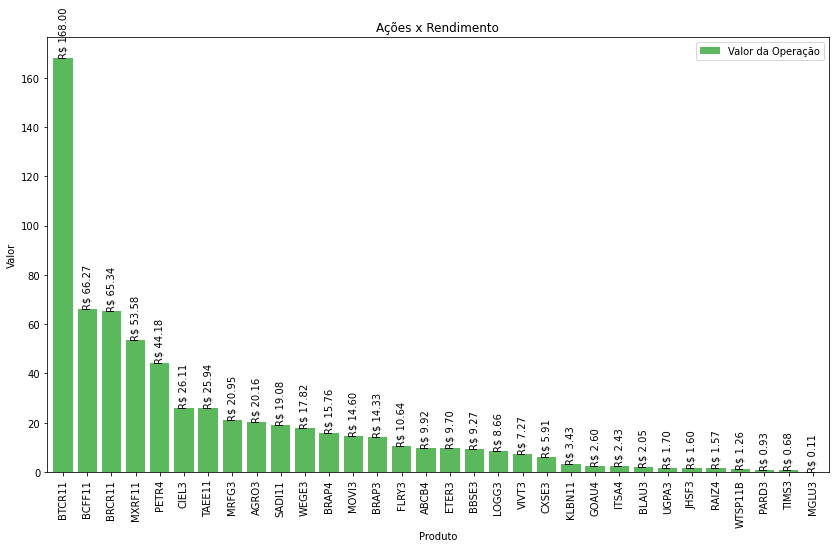

In [64]:
df_by_product = df_by_product.sort_values(['Valor da Operação'], ascending=False)

colors = ['#5cb85c', '#5bc0de', '#d9534f']
p1 = df_by_product.plot(kind='bar', color=colors, figsize=(14, 8), rot=90, width=0.8, ylabel='Valor', title="Ações x Rendimento")

for p in p1.containers:
    p1.bar_label(p, fmt='R$ %.2f', label_type='edge', rotation=90)


##### Dividendos Mensais

In [67]:
df_by_products_monthly_income = df_income_only.groupby([df_income_only['Produto'], df_income_only['Data'].dt.strftime('%m/%Y') ],  as_index=True)['Valor da Operação'].sum()  
# df_by_products_monthly_income = df_income_only.groupby([df_income_only['Data'].dt.month.rename('ju'), df_income_only['Produto']],  as_index=True)['Preço unitário'].sum()  

df_by_products_monthly_income
print(df_by_products_monthly_income)
# df_income_only.info()

# df_by_products_monthly_income[df_by_products_monthly_income['Produto'].isin(['BCFF11'])]



# print(df_by_products_monthly_income.loc[(df_by_products_monthly_income.index.get_loc ) ])
# # df_by_products_monthly_income.loc['BCFF11']:

# df_by_products_monthly_income.plot(kind='bar', color=colors, figsize=(14, 8), rot=0, width=0.8, ylabel='Valor', title="Ações x Rendimento")

Produto  Data   
ABCB4    04/2022     4.53
         07/2022     5.39
AGRO3    04/2022    20.16
BBSE3    02/2022     9.27
BCFF11   01/2022     6.51
                    ...  
VIVT3    10/2022     7.27
WEGE3    03/2022     9.82
         08/2022     8.00
WTSP11B  03/2022     0.63
         04/2022     0.63
Name: Valor da Operação, Length: 81, dtype: float64


##### Exemplo de Gráfico com Multiplas Colunas

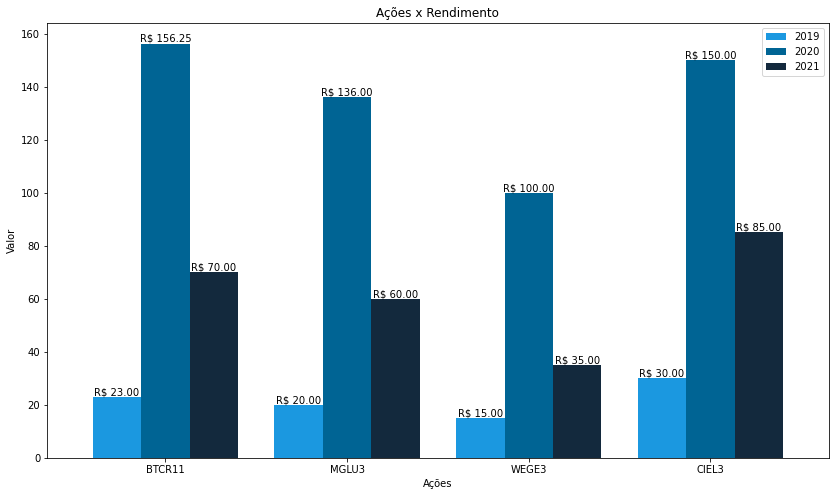

In [ ]:
data=[["BTCR11",23.00,156.25,70.00],
      ["MGLU3",20,136,60],
      ["WEGE3",15,100,35],
      ["CIEL3",30,150,85]
     ]

colors = ['#1B98E0', '#006494', '#13293D']

df=pd.DataFrame(data,columns=["Ações","2019", "2020", "2021"])
p2 = df.plot(x="Ações",  kind='bar', color=colors, figsize=(14, 8), rot=0, width=0.8,  ylabel='Valor', title="Ações x Rendimento")

for p in p2.containers:
    p2.bar_label(p, fmt='R$ %.2f', label_type='edge')


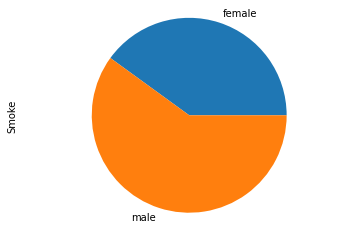

<AxesSubplot:ylabel='total_arrests'>

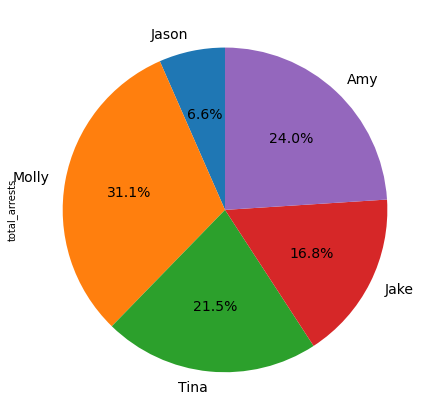

In [ ]:
df = pd.DataFrame({'Sex': ['female', 'male', 'female'], 'Smoke': [1, 3, 1]})

df.Smoke.groupby(df.Sex).sum().plot(kind='pie')
plt.axis('equal')
plt.show()





# sample data
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)


